# Visualizing Centroids

In [1]:
import os
from os import listdir
from os.path import isfile, join, splitext
import sys
import csv
import re

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# list shp files recursively
os.chdir('..')
abs_path = os.getcwd()

HIFLD_path = os.path.join(abs_path, 'output/HIFLD/centroids')
shp_files = [os.path.join(root, name) \
             for root, dirs, files in os.walk(HIFLD_path) \
             for name in files \
             if name.endswith(('.shp'))]
# csv_files = [f for f in listdir(HIFLD_path) if isfile(join(HIFLD_path, f)) and f.endswith(".csv")]
# csv_paths = [join(HIFLD_path, a) for a in csv_files]

EJI_folder = os.path.join(abs_path, 'data/EJI_US/United States.gdb')
EJI_file = 'a00000009.gdbtable'
EJI_path = os.path.join(EJI_folder, EJI_file)

state_folder = os.path.join(abs_path, 'data/cb_2021_us_state_500k')
state_file = 'cb_2021_us_state_500k.shp'
state_path = os.path.join(state_folder, state_file)

In [3]:
# EJI_shapes = gpd.read_file(EJI_path)
state_shapes = gpd.read_file(state_path)

centroids_omop = []
for file in shp_files:
    basename = os.path.basename(file).split('/')[0]
    fname = os.path.basename(basename).split('.')[0]

    # print(file)
    gdf = gpd.read_file(file)
    centroids_omop.append(gdf)

centroids_shp = pd.concat(centroids_omop)

In [4]:
# EJI_shapes_contiguous = EJI_shapes.to_crs("ESRI:102003")
# convert shapefiles to Albers contiguous coordinate reference system
state_shapes_contiguous = state_shapes.to_crs("ESRI:102003")
centroids_shp_contiguous = centroids_shp.to_crs("ESRI:102003")

# Plot Figures

Text(0.5, 1.0, 'US States (Blue) & HIFLD Centroids (Red)')

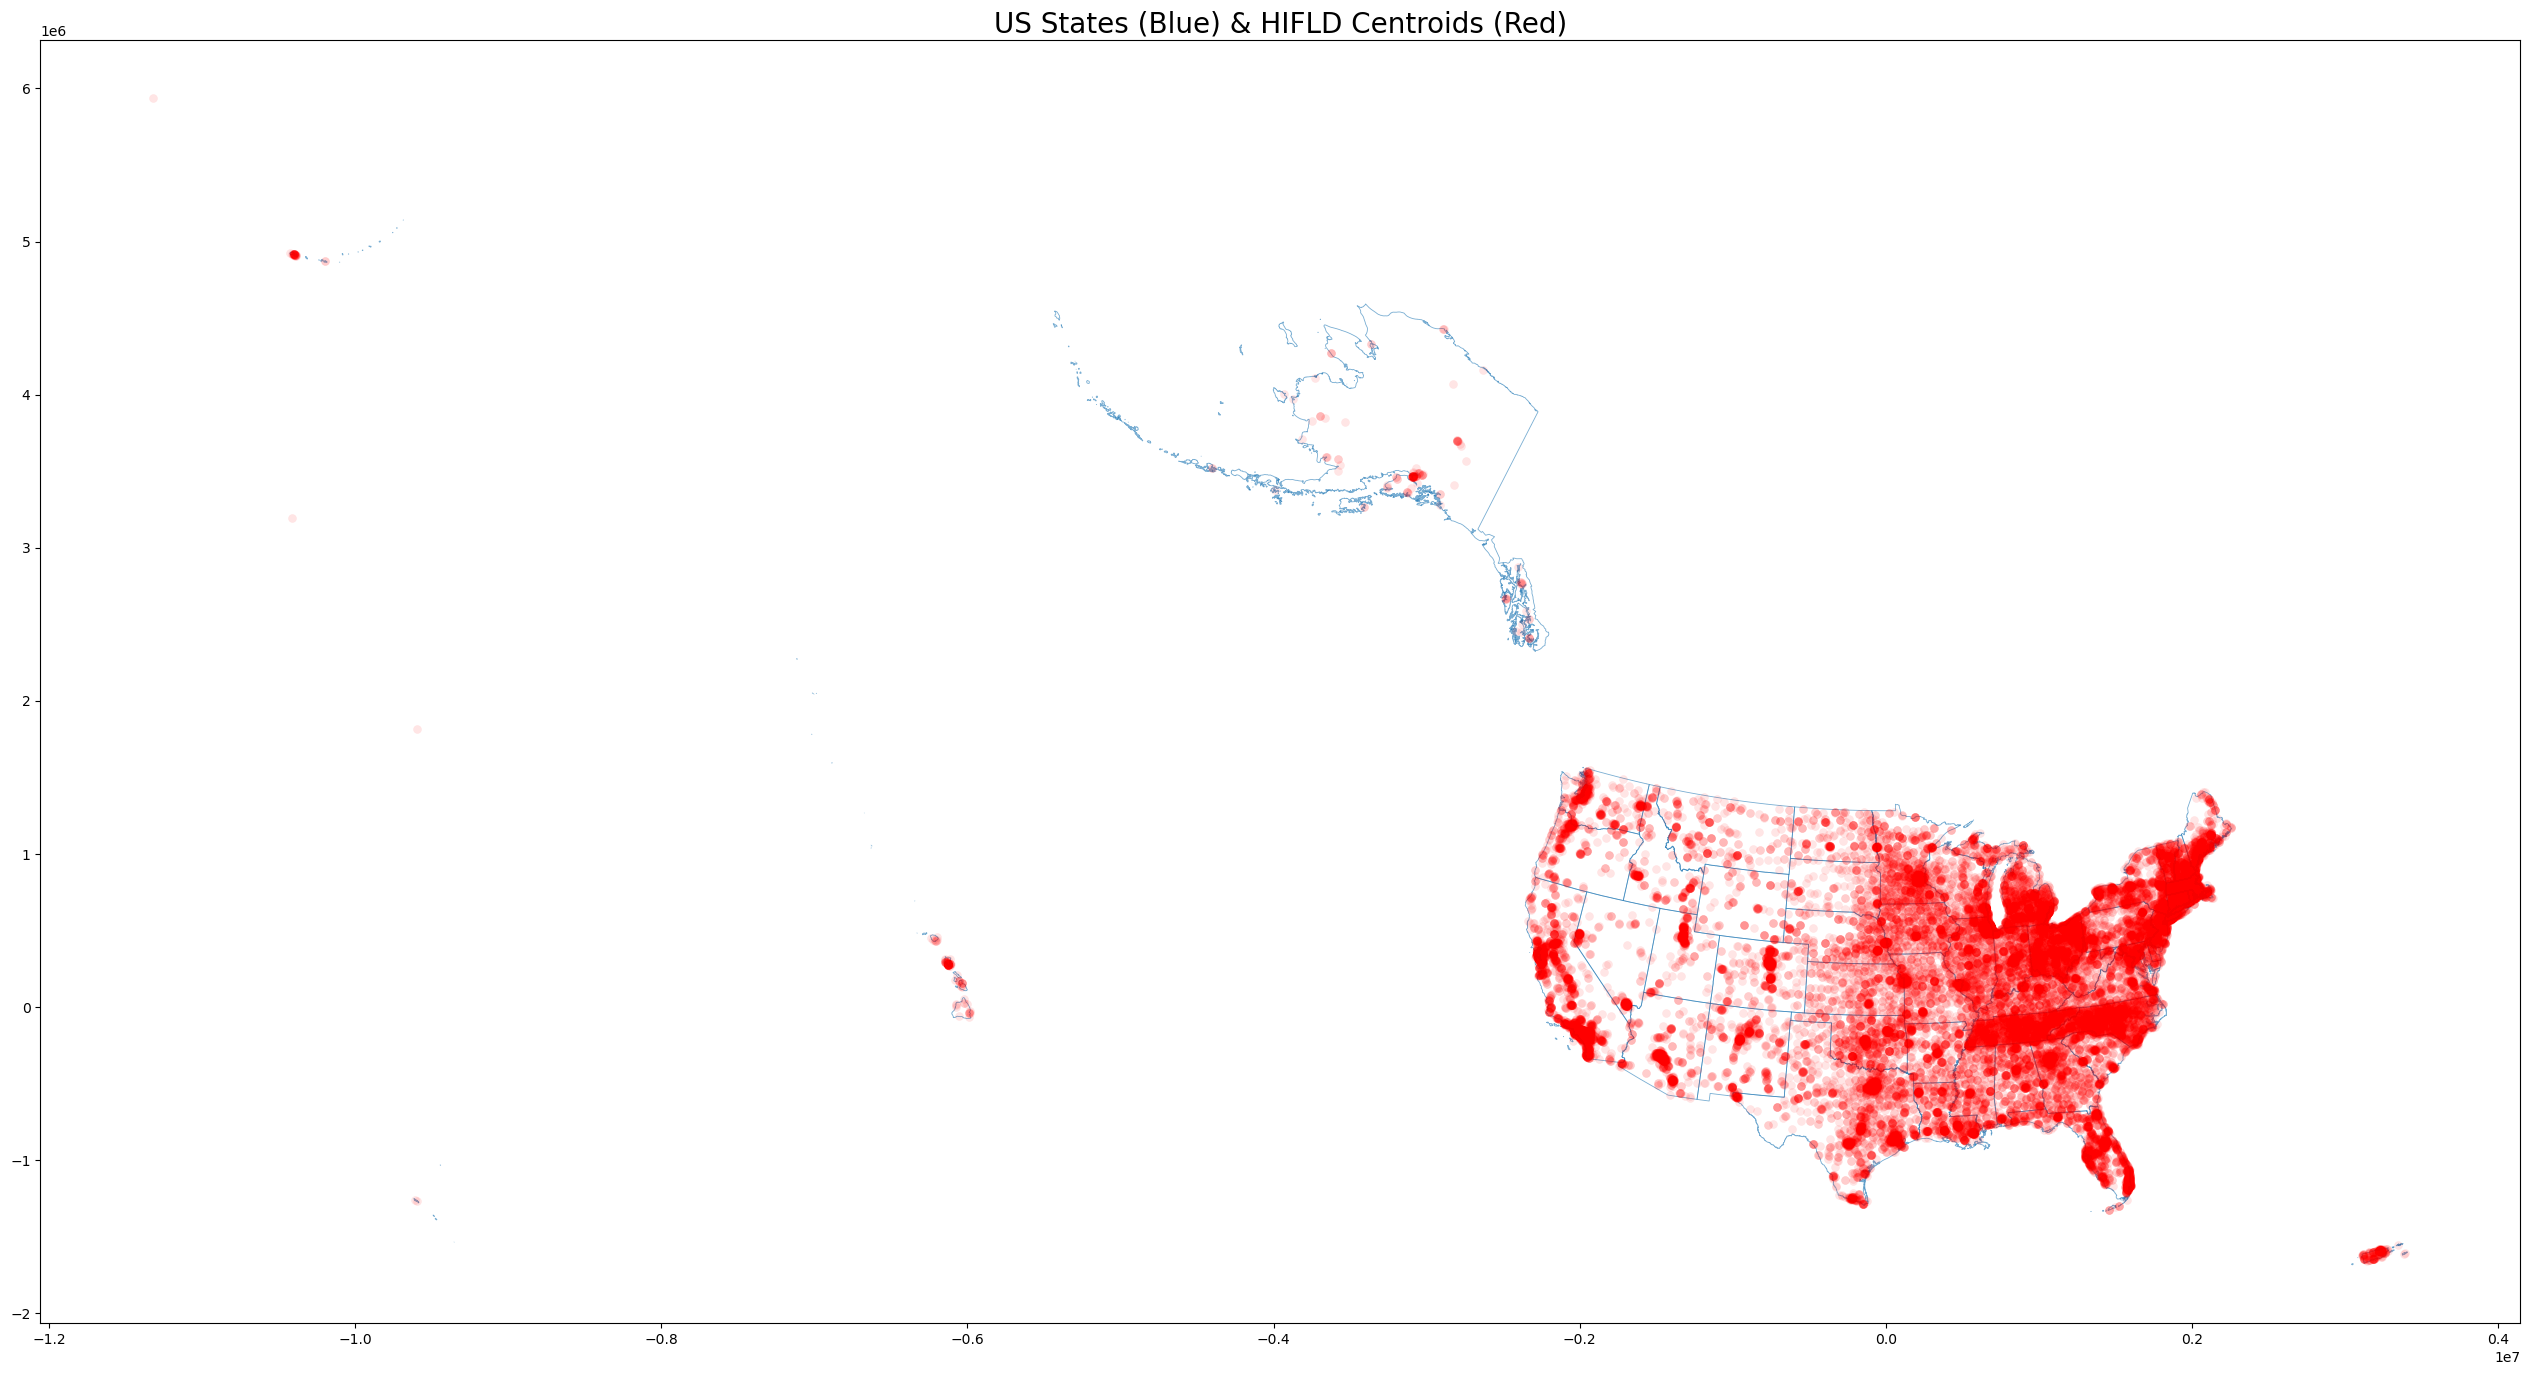

In [10]:
figures_path = os.path.join(abs_path, 'figures')

# initial centroid sample
fig, ax = plt.subplots(figsize=(32, 32))
state_shapes_contiguous.boundary.plot(ax=ax, alpha=0.6, linewidth=0.6, zorder=1)
centroids_shp_contiguous.plot(ax=ax, color='red', alpha=0.1, zorder=2, linewidth=0.1)
ax.set_title("US States (Blue) & HIFLD Centroids (Red)", fontsize=20)
# plt.savefig(os.path.join(figures_path, 'EJI_tribalLands2.jpg'), bbox_inches='tight', dpi=300)

Text(0.5, 1.0, 'US States (Blue) & HIFLD Centroids (Orange)')

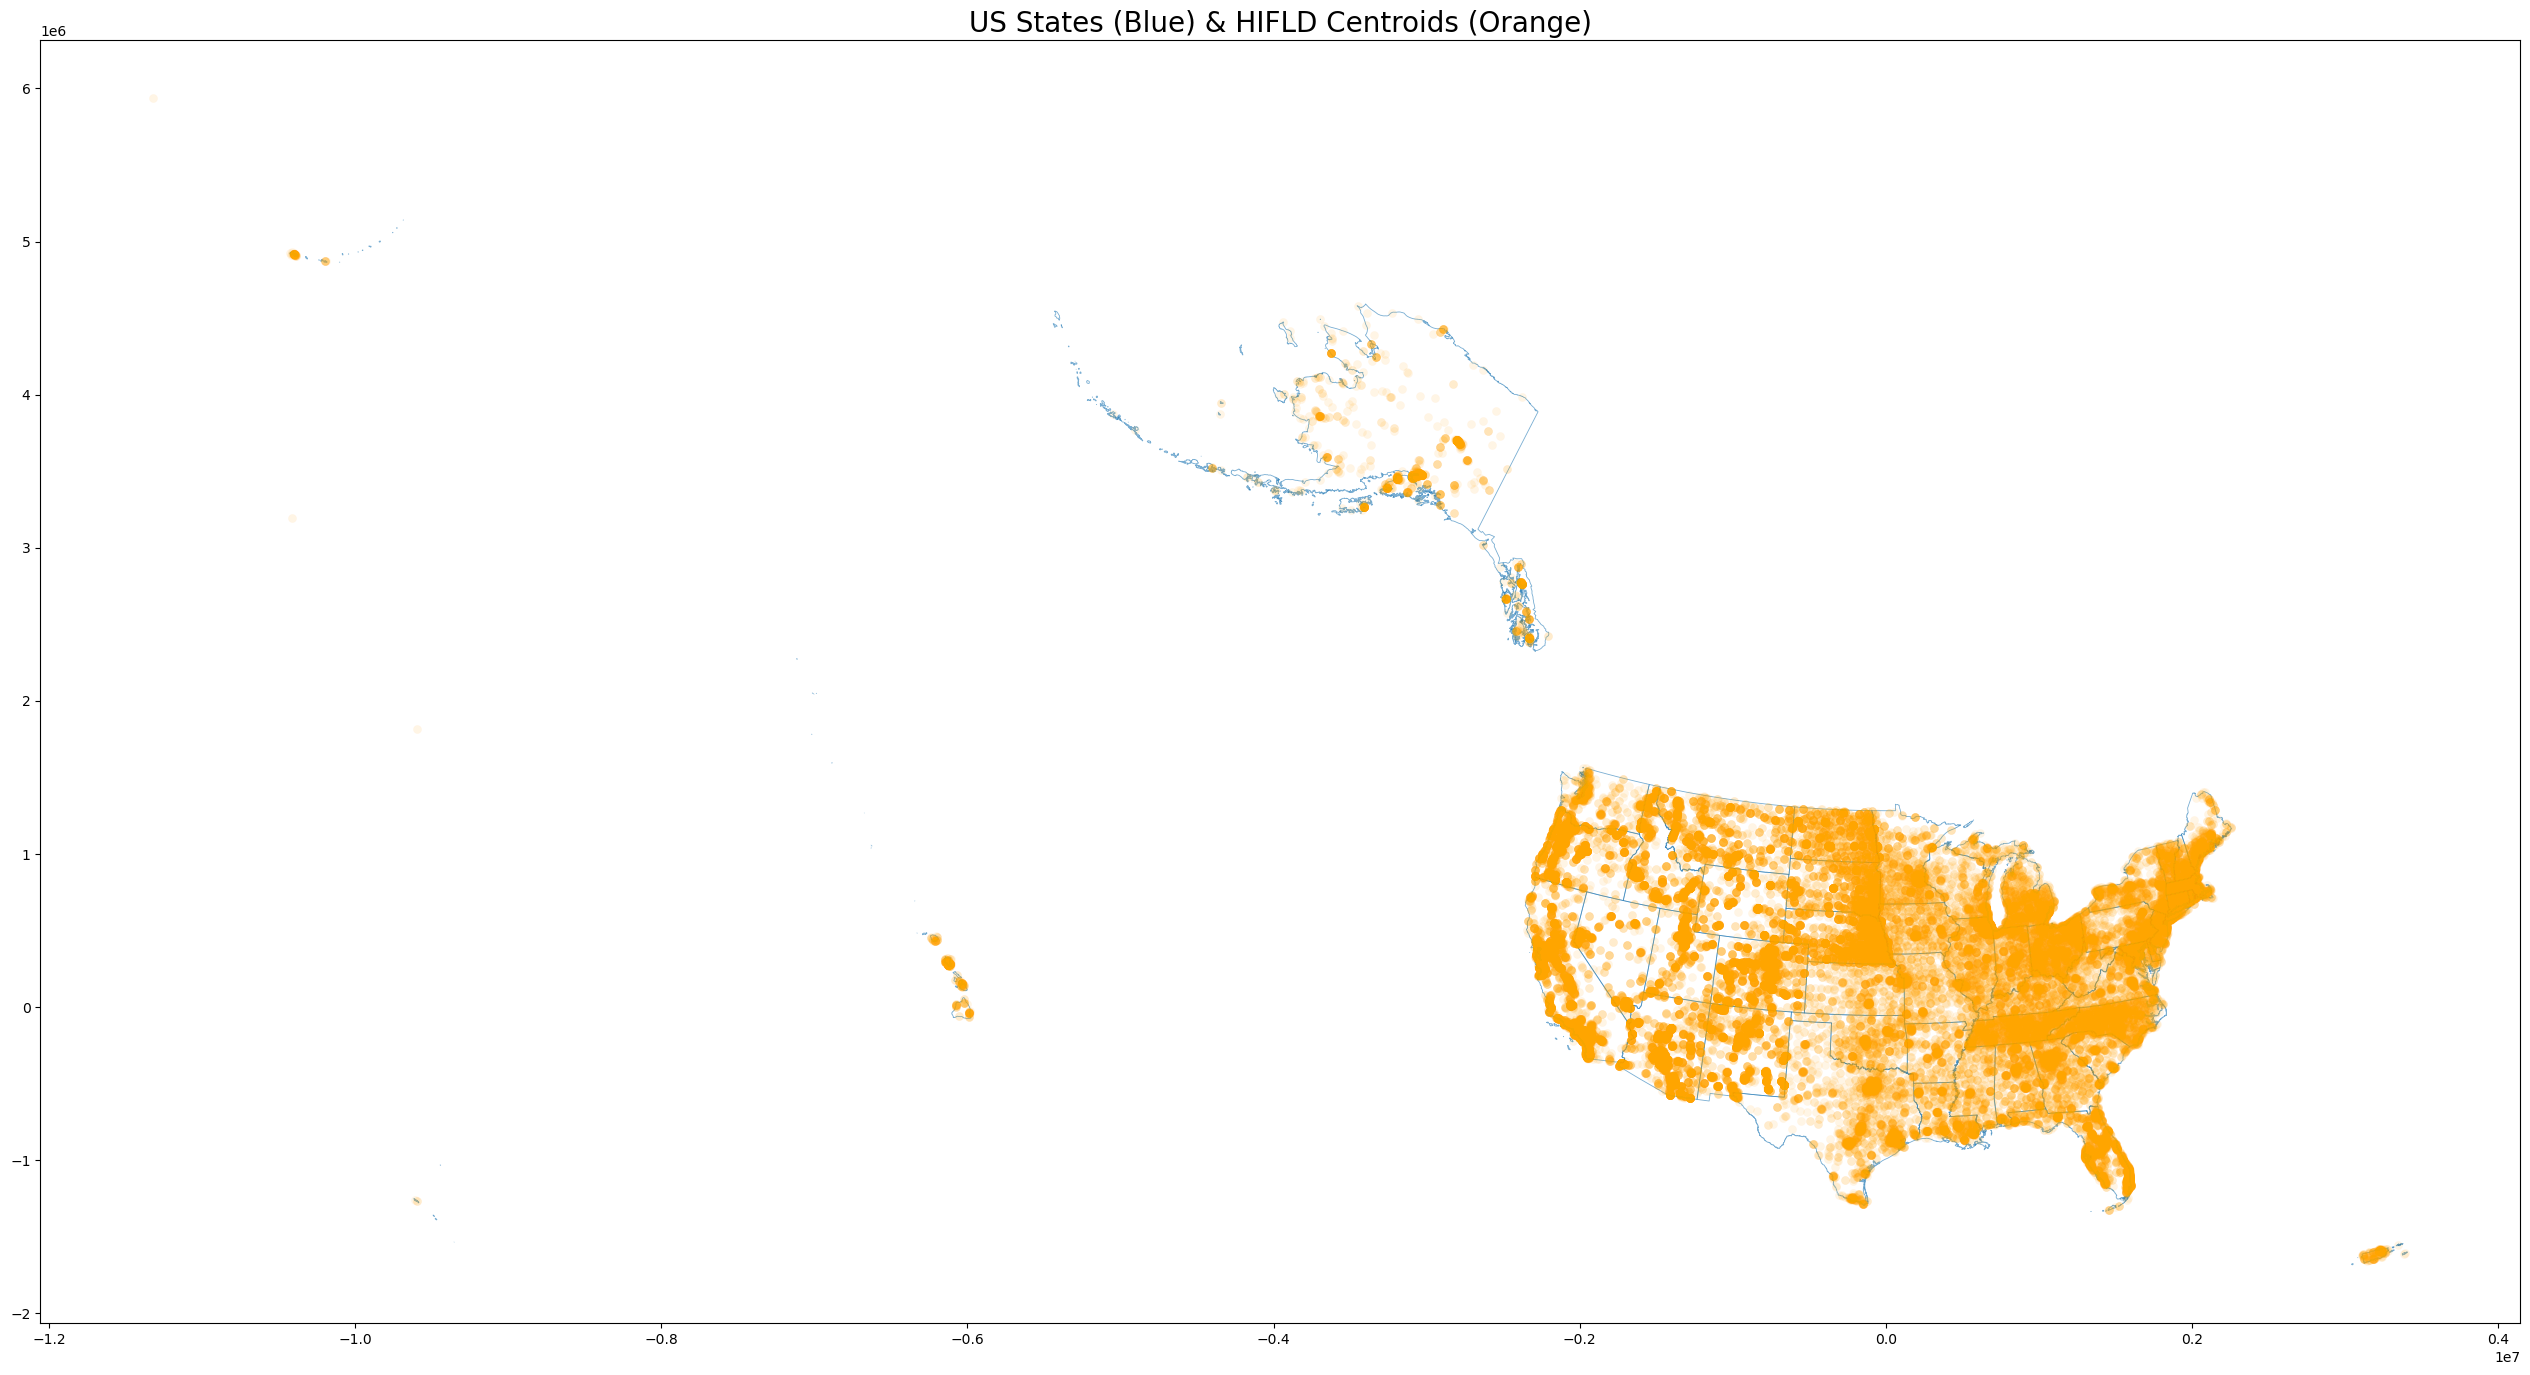

In [5]:
# EJI census tracts and HIFLD centroids
figures_path = os.path.join(abs_path, 'figures')

# initial sample + oversampled regions
fig, ax = plt.subplots(figsize=(32, 32))
state_shapes_contiguous.boundary.plot(ax=ax, alpha=0.6, linewidth=0.6, zorder=1)
centroids_shp_contiguous.plot(ax=ax, color='orange', alpha=0.1, zorder=2, linewidth=0.1)
ax.set_title("US States (Blue) & HIFLD Centroids (Orange)", fontsize=20)
# plt.savefig(os.path.join(figures_path, 'EJI_tribalLands2.jpg'), bbox_inches='tight', dpi=300)